In [2]:
import control
import numpy as np
import matplotlib.pyplot as plt
import kontrol


h_sc_mean = kontrol.load_transfer_function("sensor_correction_filters/h_sc_mean.pkl")
h_sc_sigma1 = kontrol.load_transfer_function("sensor_correction_filters/h_sc_sigma1.pkl")
h_sc_sigma2 = kontrol.load_transfer_function("sensor_correction_filters/h_sc_sigma2.pkl")

h_sc_prefilt = kontrol.load_transfer_function("sensor_correction_filters/prefilt.pkl")

h_sc_mean_p = h_sc_mean * h_sc_prefilt
h_sc_sigma1_p = h_sc_sigma1 * h_sc_prefilt
h_sc_sigma2_p = h_sc_sigma2 * h_sc_prefilt

h1_mean = kontrol.load_transfer_function("complementary_filters/h1_mean.pkl")
h2_mean = kontrol.load_transfer_function("complementary_filters/h2_mean.pkl")

h1_sigma1 = kontrol.load_transfer_function("complementary_filters/h1_sigma1.pkl")
h2_sigma1 = kontrol.load_transfer_function("complementary_filters/h2_sigma1.pkl")

h1_sigma2 = kontrol.load_transfer_function("complementary_filters/h1_sigma2.pkl")
h2_sigma2 = kontrol.load_transfer_function("complementary_filters/h2_sigma2.pkl")

h2_prefilt = kontrol.load_transfer_function("complementary_filters/h2_prefilt.pkl")

h2p_mean = h2_mean * h2_prefilt
h2p_sigma1 = h2_sigma1 * h2_prefilt
h2p_sigma2 = h2_sigma2 * h2_prefilt

In [3]:
seis_data = np.load("noise_spectrums/seismic_mean.npz")
sts_data = np.load("noise_spectrums/seismometer_mean.npz")
cps_data = np.load("noise_spectrums/cps.npz")
inert_data = np.load("noise_spectrums/inert_mean.npz")

f = seis_data["f"]
seis = seis_data["data"]
sts = sts_data["data"]
cps = cps_data["data"]
inert = inert_data["data"]

In [4]:
sc_list = [h_sc_mean_p, h_sc_sigma1_p, h_sc_sigma2_p]
lp_list = [h1_mean, h1_sigma1, h1_sigma2]
hp_list = [h2p_mean, h2p_sigma1, h2p_sigma2]
n_super_list = []

for sc in sc_list:
    seis_filt = abs((1-sc)(1j*2*np.pi*f)) * seis
    sts_filt = abs(sc(1j*2*np.pi*f)) * sts
    n_sc = (seis_filt**2 + sts_filt**2)**.5
    n_cps = (cps**2 + n_sc**2)**.5
    for lp, hp in zip(lp_list, hp_list):
        cps_filt = abs(lp(1j*2*np.pi*f)) * n_cps
        inert_filt = abs(hp(1j*2*np.pi*f)) * inert
        n_super = (cps_filt**2 + inert_filt**2)**.5
        n_super_list.append(n_super)

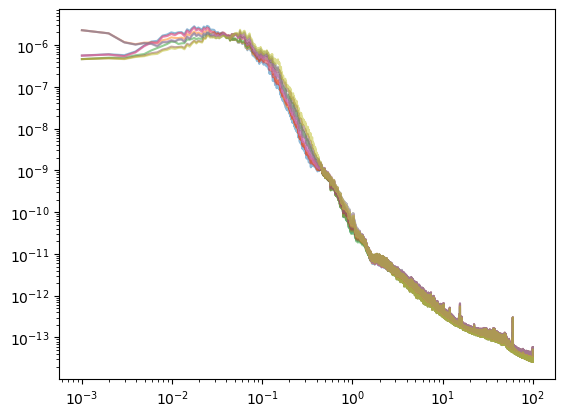

In [103]:
for n_super in n_super_list:
    plt.loglog(f, n_super, alpha=.5)

In [39]:
print(h_sc_mean.foton())

zpk([-0.009488+i*-0.026201;-0.009488+i*0.026201;-0.314225;-0.366388;-0.581935;-0.649221+i*-0.875250;-0.649221+i*0.875250;-0.690941+i*-0.892694;-0.690941+i*0.892694;-3.23142;-3.46859;-2.441958+i*-5.049870;-2.441958+i*5.049870;-2.542598+i*-5.189284;-2.542598+i*5.189284;-10.2662;-10.4901;-15.9397;-16.2144],[-0.226152;-0.128910+i*-0.195404;-0.128910+i*0.195404;-0.356073;-0.382881;-0.687256+i*-0.891557;-0.687256+i*0.891557;-0.694596+i*-0.893940;-0.694596+i*0.893940;-3.21333;-3.25002;-2.436130+i*-5.037657;-2.436130+i*5.037657;-2.448010+i*-5.062420;-2.448010+i*5.062420;-10.492507+i*-0.013886;-10.492507+i*0.013886;-15.928024+i*-0.048365;-15.928024+i*0.048365],0.831898,"s")


In [40]:
print(h_sc_sigma1.foton())

zpk([-0.016292+i*-0.023944;-0.016292+i*0.023944;-0.366388;-0.433455+i*-0.394160;-0.433455+i*0.394160;-0.179983+i*-0.977549;-0.179983+i*0.977549;-0.177677+i*-0.979446;-0.177677+i*0.979446;-3.23143;-3.96499;-2.254448+i*-5.113062;-2.254448+i*5.113062;-2.441955+i*-5.049877;-2.441955+i*5.049877;-15.7141;-15.795224+i*-0.892568;-15.795224+i*0.892568;-15.8788],[-0.128542+i*-0.284829;-0.128542+i*0.284829;-0.353188+i*-0.189339;-0.353188+i*0.189339;-0.49024;-0.179692+i*-0.977477;-0.179692+i*0.977477;-0.180269+i*-0.977645;-0.180269+i*0.977645;-3.17837;-3.28528;-2.428112+i*-5.052584;-2.428112+i*5.052584;-2.455472+i*-5.047386;-2.455472+i*5.047386;-15.586903+i*-0.162466;-15.586903+i*0.162466;-16.009535+i*-0.177842;-16.009535+i*0.177842],0.80785,"s")


In [41]:
print(h_sc_sigma2.foton())

zpk([-0.022186+i*-0.020133;-0.022186+i*0.020133;-0.36639;-0.452581+i*-0.512774;-0.452581+i*0.512774;-0.078152+i*-0.905637;-0.078152+i*0.905637;-0.078909+i*-0.909436;-0.078909+i*0.909436;-3.23143;-4.7229;-1.897492+i*-4.850835;-1.897492+i*4.850835;-2.441956+i*-5.049872;-2.441956+i*5.049872;-15.9278;-16.9332;-24.802;-26.7448],[-0.137919+i*-0.346337;-0.137919+i*0.346337;-0.392491+i*-0.262962;-0.392491+i*0.262962;-0.577193;-0.078691+i*-0.909224;-0.078691+i*0.909224;-0.079131+i*-0.909646;-0.079131+i*0.909646;-3.11777;-3.34738;-2.401761+i*-5.028812;-2.401761+i*5.028812;-2.480416+i*-5.071346;-2.480416+i*5.071346;-15.8764;-15.9817;-26.6328;-26.8544],0.813202,"s")


In [87]:
import control
s = control.tf("s")

In [90]:
print(kontrol.TransferFunction((h_sc_prefilt*1/s).minreal()).foton())

zpk([0;0],[-0.018849+i*0.000000;-0.018849+i*-0.000000;-0.0188498],1,"s")


In [115]:
h1_mean_ = control.tf(h1_mean.minreal().num[0][0][0:], h1_mean.minreal().den[0][0][1:])
print(kontrol.TransferFunction(h1_mean_).foton())

15:44 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-0.222134+i*-0.978969;-0.222134+i*0.978969;-1.25561;-1.38672;-1.350443+i*-1.755430;-1.350443+i*1.755430;-0.379592+i*-2.565263;-0.379592+i*2.565263;-2.82711;-2.014636+i*-4.224375;-2.014636+i*4.224375;-6.28318;-2.980855+i*-11.048562;-2.980855+i*11.048562;-13.379694+i*-17.016832;-13.379694+i*17.016832;-32.437752+i*-27.086732;-32.437752+i*27.086732;-757.42],[-0.286551+i*-0.659138;-0.286551+i*0.659138;-0.232894+i*-0.681136;-0.232894+i*0.681136;-1.24893;-1.2614;-1.340182+i*-1.758987;-1.340182+i*1.758987;-1.361536+i*-1.752347;-1.361536+i*1.752347;-4.222035+i*-0.108958;-4.222035+i*0.108958;-6.279353+i*-0.181772;-6.279353+i*0.181772;-9.537068+i*-0.563504;-9.537068+i*0.563504;-12.981120+i*-16.254379;-12.981120+i*16.254379;-13.672529+i*-17.904602;-13.672529+i*17.904602],0.000113919,"s")

zpk([-0.017641+i*0.001042;-0.017641+i*-0.001042;-0.020120+i*0.001262;-0.020120+i*-0.001262;-0.0690563;-0.0796377;-0.101493;-0.042209+i*0.094812;-0.042209+i*-0.094812;-0.089400+i*0.129865;-0.089400+i*-0.12986

In [107]:
h1_mean.minreal()

TransferFunction(array([2.13983891e+00, 1.87691070e+03, 2.09138471e+05, 1.19728513e+07,
       4.05110895e+08, 9.35771422e+09, 1.51831758e+11, 1.85771848e+12,
       1.71938443e+13, 1.21536471e+14, 6.70794884e+14, 2.93190712e+15,
       1.03027752e+16, 2.94645009e+16, 6.89642699e+16, 1.32321769e+17,
       2.07874799e+17, 2.67224014e+17, 2.81311684e+17, 2.41986869e+17,
       1.68938277e+17, 9.48190626e+16, 4.21879607e+16, 1.46060895e+16,
       3.88449818e+15, 7.93105615e+14, 1.24745875e+14, 1.51222639e+13,
       1.40649518e+12, 9.90026407e+10, 5.12750951e+09, 1.87088280e+08,
       4.55105066e+06, 6.90252638e+04, 5.85054142e+02, 2.10683449e+00]), array([1.00000000e+00, 1.87838943e+04, 1.96748773e+06, 1.04593288e+08,
       3.54068206e+09, 8.33677307e+10, 1.41857294e+12, 1.77679600e+13,
       1.66057974e+14, 1.17439628e+15, 6.38067230e+15, 2.70411488e+16,
       9.06406736e+16, 2.43061113e+17, 5.25994277e+17, 9.24628814e+17,
       1.32710012e+18, 1.56221952e+18, 1.51424347e+18, 1.2

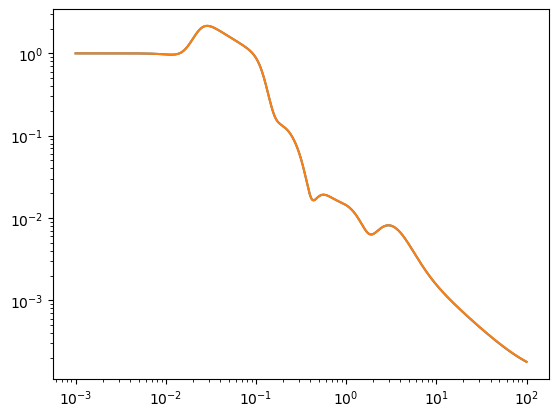

In [116]:
plt.loglog(f, abs(h1_mean_(1j*2*np.pi*f)))
plt.loglog(f, abs(h1_mean(1j*2*np.pi*f)))

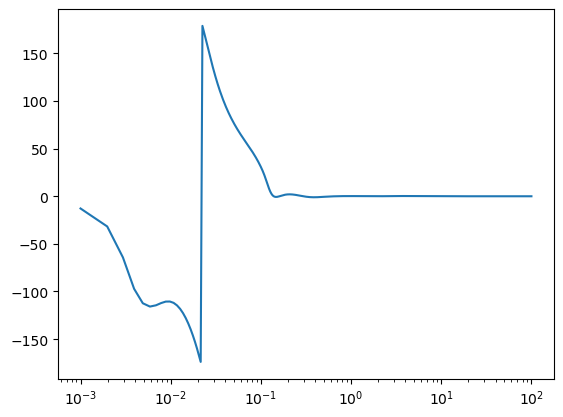

In [6]:
# plt.semilogx(f, abs(h(1j*2*np.pi*f)))
plt.semilogx(f, np.angle(h2_sigma1(1j*2*np.pi*f), deg=True))

In [100]:
h1_mean

TransferFunction(array([5.39801066e-18, 2.06444069e+00, 4.62140762e+02, 6.14205423e+04,
       4.18835229e+06, 1.48170248e+08, 3.63547980e+09, 6.27755014e+10,
       9.03724310e+11, 1.03655094e+13, 1.00469331e+14, 8.23926479e+14,
       5.70863536e+15, 3.40593870e+16, 1.74200389e+17, 7.69523957e+17,
       2.93173903e+18, 9.59354025e+18, 2.68467370e+19, 6.35619183e+19,
       1.25770110e+20, 2.05446346e+20, 2.74874094e+20, 3.00361321e+20,
       2.66819485e+20, 1.90979621e+20, 1.08975039e+20, 4.87927638e+19,
       1.67699965e+19, 4.35283205e+18, 8.50072568e+17, 1.24680782e+17,
       1.36064152e+16, 1.08214840e+15, 6.00696501e+13, 2.12028899e+12,
       3.85160520e+10, 1.79753272e+08, 2.45251118e+05]), array([1.00000000e+00, 1.87845449e+04, 1.97981786e+06, 1.07928565e+08,
       3.82432292e+09, 9.71795583e+10, 1.86521322e+12, 2.80437777e+13,
       3.40032492e+14, 3.38668447e+15, 2.79282081e+16, 1.91427601e+17,
       1.09605432e+18, 5.27203408e+18, 2.13686125e+19, 7.29260883e+19,
   

In [133]:
h2_mean_ = control.tf(h2_mean.num[0][0][1:], h2_mean.den[0][0][1:])
print(kontrol.TransferFunction(h2_mean_).foton())

16:14 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-1.25546;-1.339;-1.350787+i*-1.755717;-1.350787+i*1.755717;-1.278953+i*-1.940006;-1.278953+i*1.940006;-3.07534;-0.080000+i*-4.230000;-0.080000+i*4.230000;-4.501879+i*-2.826168;-4.501879+i*2.826168;-6.28297;-0.279968+i*-9.560027;-0.279968+i*9.560027;-11.095428+i*-3.975812;-11.095428+i*3.975812;-13.052137+i*-16.082439;-13.052137+i*16.082439;-13.600471+i*-17.874175;-13.600471+i*17.874175],[-1.24893;-1.2614;-1.340182+i*-1.758987;-1.340182+i*1.758987;-1.361536+i*-1.752347;-1.361536+i*1.752347;-4.222454+i*-0.107916;-4.222454+i*0.107916;-0.080000+i*-4.230000;-0.080000+i*4.230000;-6.294221+i*0.083975;-6.294221+i*-0.083975;-9.536463+i*-0.338736;-9.536463+i*0.338736;-0.279968+i*-9.560027;-0.279968+i*9.560027;-13.055015+i*-16.186681;-13.055015+i*16.186681;-13.585071+i*-17.952470;-13.585071+i*17.952470],0.99989,"s")

zpk([-0.00073978;-0.00299606;-0.0128781;-0.005801+i*-0.018529;-0.005801+i*0.018529;-0.0223176;-0.0796224;-0.0944424;-0.092202+i*-0.128530;-0.092202+i*0.128530;-0.176451;-0.486606

In [131]:
h2_mean_.minreal()

TransferFunction(array([9.99890099e-01, 1.04651645e+02, 5.55754283e+03, 1.87884782e+05,
       4.41767139e+06, 7.50466057e+07, 9.38250283e+08, 8.74686553e+09,
       6.16562964e+10, 3.33575262e+11, 1.40582586e+12, 4.67759799e+12,
       1.24188937e+13, 2.65070698e+13, 4.57098187e+13, 6.38772212e+13,
       7.24800695e+13, 6.68176605e+13, 4.99135354e+13, 2.99896742e+13,
       1.43071109e+13, 5.30855154e+12, 1.48779320e+12, 3.05844075e+11,
       4.52243612e+10, 4.69399530e+09, 3.27039634e+08, 1.44971620e+07,
       3.99798557e+05, 7.37207833e+03, 9.09847970e+01, 6.07089101e-01,
       1.42371835e-03, 7.55708328e-07]), array([1.00000000e+00, 1.04676168e+02, 5.56078289e+03, 1.88102731e+05,
       4.42504692e+06, 7.52108546e+07, 9.40655892e+08, 8.77472604e+09,
       6.19086022e+10, 3.35364239e+11, 1.41615644e+12, 4.72640023e+12,
       1.26089084e+13, 2.71180998e+13, 4.73188766e+13, 6.73174815e+13,
       7.84113122e+13, 7.50528574e+13, 5.91466884e+13, 3.83400472e+13,
       2.03589843e+

In [65]:
print(h1_sigma1.foton())

08:26 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-0.554885+i*-2.955983;-0.554885+i*2.955983;-0.079979+i*-4.229988;-0.079979+i*4.229988;-2.563269+i*-3.466335;-2.563269+i*3.466335;-6.28318;-0.279969+i*-9.560020;-0.279969+i*9.560020;-3.063397+i*-10.606651;-3.063397+i*10.606651;-11.046552+i*9.104190;-11.046552+i*-9.104190;-12.761782+i*-8.045441;-12.761782+i*8.045441;-13.378202+i*-17.014888;-13.378202+i*17.014888;-34.926058+i*-28.351968;-34.926058+i*28.351968;-718.597],[-1.339546+i*-1.765036;-1.339546+i*1.765036;-4.230617+i*-0.010815;-4.230617+i*0.010815;-0.080000+i*-4.230000;-0.080000+i*4.230000;-6.27407;-6.29659;-9.45444;-0.280001+i*-9.559999;-0.280001+i*9.559999;-9.66429;-12.705495+i*-7.752778;-12.705495+i*7.752778;-12.770120+i*-8.357619;-12.770120+i*8.357619;-13.024098+i*-16.993876;-13.024098+i*16.993876;-13.770583+i*-17.064296;-13.770583+i*17.064296],0.000122388,"s")

zpk([-0.0149202;-0.017292+i*0.004609;-0.017292+i*-0.004609;-0.0276376;-0.079163+i*-0.002426;-0.079163+i*0.002426;-0.043697+i*-0.100821;-0.043697+i*0.100821;-0.0853

In [66]:
print(h2_sigma1.foton())

08:27 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-1.362908+i*-1.934309;-1.362908+i*1.934309;-3.14024;-0.080000+i*-4.230000;-0.080000+i*4.230000;-4.557193+i*-2.466159;-4.557193+i*2.466159;-6.28319;-0.280001+i*-9.560000;-0.280001+i*9.560000;-10.589615+i*4.356919;-10.589615+i*-4.356919;-12.951928+i*-7.700427;-12.951928+i*7.700427;-12.916656+i*-8.284952;-12.916656+i*8.284952;-13.023753+i*-16.895809;-13.023753+i*16.895809;-13.758593+i*-16.958779;-13.758593+i*16.958779],[-1.339546+i*-1.765036;-1.339546+i*1.765036;-4.230617+i*-0.010815;-4.230617+i*0.010815;-0.080000+i*-4.230000;-0.080000+i*4.230000;-6.27407;-6.29659;-9.45444;-0.280001+i*-9.559999;-0.280001+i*9.559999;-9.66429;-12.705495+i*-7.752778;-12.705495+i*7.752778;-12.770120+i*-8.357619;-12.770120+i*8.357619;-13.024098+i*-16.993876;-13.024098+i*16.993876;-13.770583+i*-17.064296;-13.770583+i*17.064296],0.999878,"s")

zpk([0.008650+i*0.019144;0.008650+i*-0.019144;-0.025815+i*0.038282;-0.025815+i*-0.038282;-0.0795559;-0.086925+i*0.120577;-0.086925+i*-0.120577;-0.174388;-0.50289;-0.1

In [83]:
print(kontrol.TransferFunction(h1_sigma2.minreal()).foton())

08:33 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-0.640431;-0.555786+i*0.536508;-0.555786+i*-0.536508;-0.253912+i*-1.008951;-0.253912+i*1.008951;-1.339384+i*-1.752413;-1.339384+i*1.752413;-2.81772;0.159737+i*-3.076530;0.159737+i*3.076530;-1.739161+i*-4.660493;-1.739161+i*4.660493;-6.28315;-3.079894+i*-9.339373;-3.079894+i*9.339373;-13.379803+i*-17.016773;-13.379803+i*17.016773;-13.671755+i*-27.372257;-13.671755+i*27.372257;-32.4829],[-0.275813+i*-0.650477;-0.275813+i*0.650477;-0.675897+i*-0.806474;-0.675897+i*0.806474;-1.17735;-1.254630+i*-1.832157;-1.254630+i*1.832157;-1.493498+i*-1.692551;-1.493498+i*1.692551;-3.8764;-4.75926;-5.60593;-6.217293+i*-0.171455;-6.217293+i*0.171455;-9.601043+i*-0.370799;-9.601043+i*0.370799;-13.375684+i*-17.016838;-13.375684+i*17.016838;-13.383494+i*-17.016653;-13.383494+i*17.016653],0.0763607,"s")

zpk([-0.017651+i*0.001089;-0.017651+i*-0.001089;-0.020093+i*0.001189;-0.020093+i*-0.001189;-0.004417+i*0.022599;-0.004417+i*-0.022599;-0.0719012;-0.0795767;-0.048468+i*0.127556;-0.048468+i*-0.127556;-0.

In [84]:
print(h2_sigma2.foton())

08:34 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-1.350787+i*-1.755717;-1.350787+i*1.755717;-1.112381+i*-2.272064;-1.112381+i*2.272064;-2.85562;-0.080000+i*-4.230000;-0.080000+i*4.230000;-3.612439+i*-3.474510;-3.612439+i*3.474510;-6.28319;-0.280001+i*-9.560000;-0.280001+i*9.560000;-8.348782+i*5.350613;-8.348782+i*-5.350613;-14.2891;-13.379678+i*-17.016841;-13.379678+i*17.016841;-13.473854+i*-17.064630;-13.473854+i*17.064630],[-1.17735;-1.254630+i*-1.832157;-1.254630+i*1.832157;-1.493498+i*1.692551;-1.493498+i*-1.692551;-3.8764;-0.080000+i*4.230000;-0.080000+i*-4.230000;-4.75926;-5.60593;-6.217293+i*0.171456;-6.217293+i*-0.171456;-0.280001+i*-9.560000;-0.280001+i*9.560000;-9.601043+i*0.370799;-9.601043+i*-0.370799;-13.375684+i*-17.016838;-13.375684+i*17.016838;-13.383495+i*-17.016653;-13.383495+i*17.016653],1,"s")

zpk([-0.00811244;-0.003495+i*0.019269;-0.003495+i*-0.019269;-0.0222836;-0.004417+i*-0.022598;-0.004417+i*0.022598;-0.006691+i*-0.027198;-0.006691+i*0.027198;-0.079575;-0.058274+i*0.156194;-0.058274+i*-0.156194;-0.17757

In [124]:
wn = 2*np.pi*1
q = 1/np.sqrt(2)
cal = (s**2 + wn/q*s + wn**2) / s**3

In [126]:
print(kontrol.TransferFunction((h2_prefilt*cal).minreal()).foton())

zpk([0;-4.442883+i*4.442883;-4.442883+i*-4.442883],[-0.018848+i*0.000002;-0.018848+i*-0.000002;-0.018851+i*0.000002;-0.018851+i*-0.000002],1,"s")


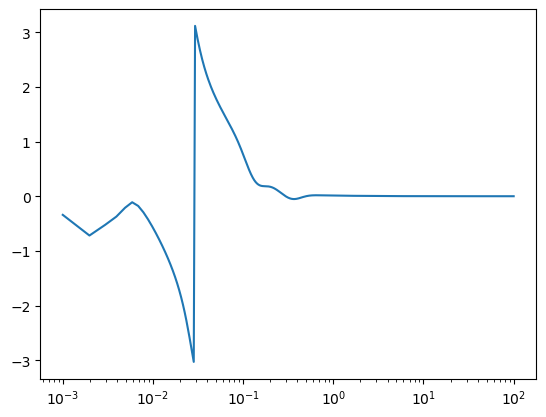

In [120]:
plt.semilogx(f, np.angle((h2_sigma2.minreal()*h2_prefilt)(1j*2*np.pi*f)))

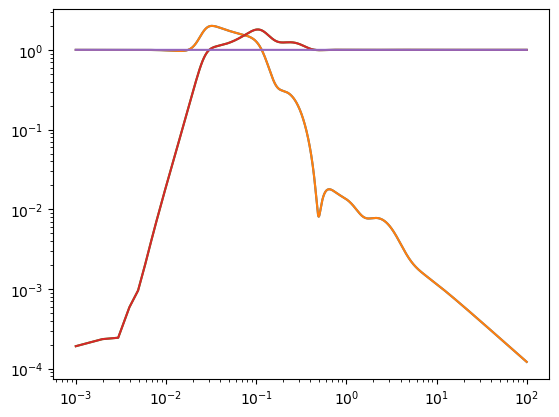

In [117]:
plt.loglog(f, abs(h1_sigma2.minreal()(1j*2*np.pi*f)))
plt.loglog(f, abs(h1_sigma2(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_sigma2.minreal()(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_sigma2(1j*2*np.pi*f)))
plt.loglog(f, abs((h2_sigma2.minreal()*h2_prefilt + h1_sigma2.minreal())(1j*2*np.pi*f)))